In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Info: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/inst/Perf_HeAr.html

Manual: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/doc/manual/EFOSC2manual_v4.2.pdf

Grism #11

In [2]:
data = fits.open('data_eso36_efosc/EFOSC_spec_HeAr227_0005.fits')[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


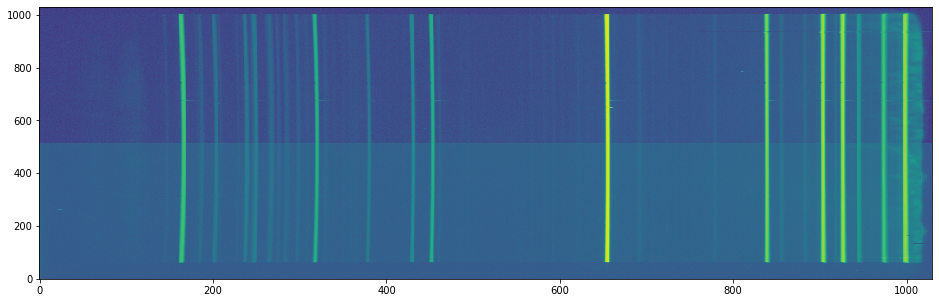

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')

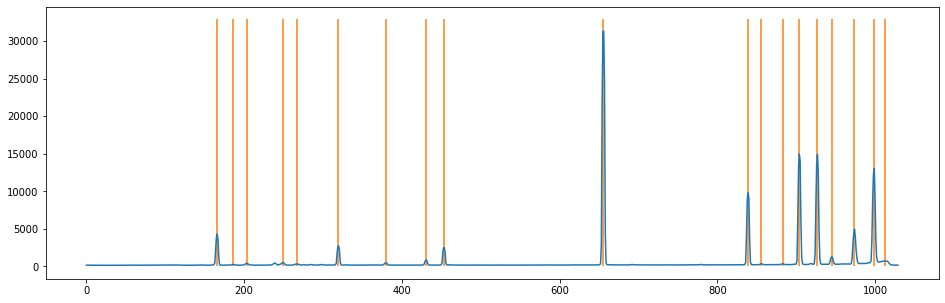

In [4]:
spectrum = np.median(data.data.T, axis=0)
peaks, _ = find_peaks(spectrum, prominence=80, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(1, figsize=(16,5))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [5]:
c = Calibrator(peaks_refined,
               min_wavelength=3300.,
               max_wavelength=7500.,
               num_pix=len(spectrum))

c.set_fit_constraints(ransac_thresh=1)
c.add_atlas(["Ar", "He"])


Peak at: 3888.675191336565 A
- matched to 3888.65 A
Peak at: 3964.310139572999 A
- matched to 3964.729 A
Peak at: 4026.977788423559 A
- matched to 4026.19 A
Peak at: 4199.848851261762 A
- matched to 4200.674 A
Peak at: 4267.382357050808 A
Peak at: 4472.318176142564 A
- matched to 4471.48 A
Peak at: 4712.826085634707 A
- matched to 4713.146 A
Peak at: 4921.750590207035 A
- matched to 4921.931 A
Peak at: 5015.681549829238 A
- matched to 5015.68 A
Peak at: 5875.800298886852 A
- matched to 5875.6148 A
Peak at: 6678.281407418915 A
- matched to 6678.152 A
Peak at: 6752.532922164686 A
- matched to 6752.834 A
Peak at: 6871.220028875161 A
- matched to 6871.289 A
Peak at: 6965.172690782329 A
- matched to 6965.43 A
Peak at: 7065.737727646424 A
- matched to 7065.2 A
Peak at: 7146.555883526209 A
- matched to 7147.04 A
Peak at: 7273.736872667614 A
- matched to 7272.94 A
Peak at: 7383.533595630321 A
- matched to 7383.98 A
Peak at: 7448.263474227479 A


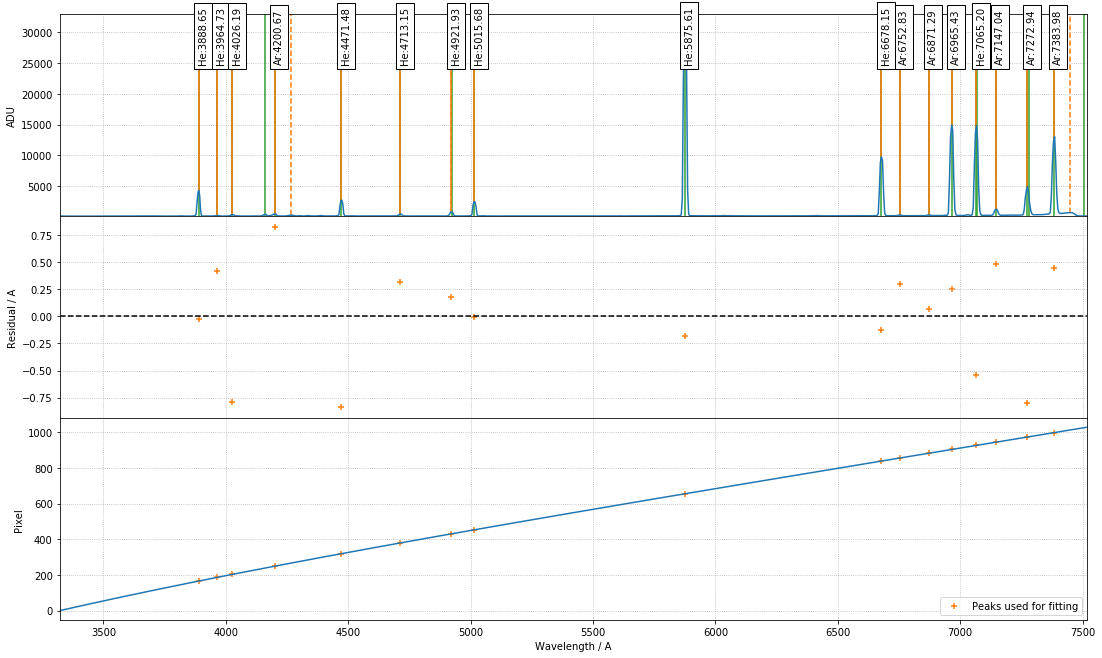

Stdev error: 0.4780823190784258 A
Peaks utilisation rate: 89.47368421052632%


In [6]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=2000)
best_p, x_fit, y_fit, residual, peak_utilisation = c.match_peaks_to_atlas(best_p, polydeg=5, tolerance=5)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False)

fit_diff = c.polyval(x_fit, best_p) - y_fit

rms = np.sqrt(np.sum(fit_diff**2 / len(x_fit)))

print("Stdev error: {} A".format(fit_diff.std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))